<a href="https://colab.research.google.com/github/gherbin/ComputerVisionKUL/blob/master/CV_Group9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import tarfile
import numpy as np
import random
import logging

from urllib import request
from socket import timeout
from urllib.error import HTTPError, URLError

from google.colab import drive
from google.colab.patches import cv2_imshow
from distutils.dir_util import copy_tree

logging.basicConfig(level=logging.DEBUG)

In [0]:
base_path = "/content/sample_data/CV__Group_assignment"

if not os.path.isdir(base_path):
  os.makedirs(base_path)

vgg_face_dataset_url = "http://www.robots.ox.ac.uk/~vgg/data/vgg_face/vgg_face_dataset.tar.gz"

with request.urlopen(vgg_face_dataset_url) as r, open(os.path.join(base_path, "vgg_face_dataset.tar.gz"), 'wb') as f:
  f.write(r.read())

with tarfile.open(os.path.join(base_path, "vgg_face_dataset.tar.gz")) as f:
  f.extractall(os.path.join(base_path))

trained_haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

with request.urlopen(trained_haarcascade_url) as r, open(os.path.join(base_path, "haarcascade_frontalface_default.xml"), 'wb') as f:
    f.write(r.read())



all_subjects = [subject for subject in sorted(os.listdir(os.path.join(base_path, "vgg_face_dataset", "files"))) if subject.startswith("B") and subject.endswith(".txt")]

nb_subjects = 0
nb_images_per_subject = 5

images = []
for subject in all_subjects[:nb_subjects]:

  with open(os.path.join(base_path, "vgg_face_dataset", "files", subject), 'r') as f:
    lines = f.readlines()

  images_ = []
  for line in lines:
    url = line[line.find("http://"): line.find(".jpg") + 4]

    try:
      res = request.urlopen(url, timeout=1)
      img = np.asarray(bytearray(res.read()), dtype="uint8")
      img = cv2.imdecode(img, cv2.IMREAD_COLOR)
      h, w = img.shape[:2]
      images_.append(img)
      cv2_imshow(cv2.resize(img, (w // 5, h // 5)))

    except:
      pass

    if len(images_) == nb_images_per_subject:
      images.append(images_)
      break

# New Section

How to generate datasets
A = Emma Stone

1.   A --> Emma Stone
2.   B --> Bradley Cooper
3.   C --> Jane Levy
4.   D --> Marc Blucas


#Idea to get the images dataset
## For A and B
1. define a seed for A, and a seed for B
2. generate a number based on this seed
3. using this number, select 50 images from the list of 1000 images provided in the database
4. Select 30 out of the 50 images obtained. This constitutes the original dataset (Training and Test) for A and B.

## For C and D
1. define a seed for C, and a seed for D
2. generator a number based on this seed
3. using this number, select 20 images from the lsit of 1000 images provided in the database
4. Select 10 out of the 20 images obtained. This constutes the original dataset for C and D.


Start from clean sheet


In [0]:
import shutil

path_datasets = r"/content/datasets/"
path_discard = r"/content/discard/"
path_database = r"/content/database/"

try:
    shutil.rmtree(path_datasets)
    shutil.rmtree(path_discard)
except:
    pass

populate database if required

In [0]:
file_info = r"/content/database/info_retrieved.txt"
path_datasets = r"/content/datasets/"
path_discard = r"/content/discard/"
path_database = r"/content/database/"
try: 
    os.mkdir(path_datasets) 
    os.mkdir(path_discard)
except OSError as error: 
    logging.error(error) 



Instead of randomly download from web, take images from "local" repository containing the 160 images downloaded once and for all.

In [7]:
drive.mount('/content/drive')
load_from_local_drive = True
if load_from_local_drive:
    try:
        os.mkdir(path_database)
    except OSError as error:
        logging.warning(error)

    fromDirectory = r"/content/drive/My Drive/ComputerVision/DATABASE"
    toDirectory= path_database
    copy_tree(fromDirectory, toDirectory)

path_, dirs_, files = next(os.walk(path_database))
if len(files) == 161:
    logging.debug("Successful database retrieval")
else:
    logging.error("Most Likely problem with database retrieval, number of files = " + str(len(files)))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


DEBUG:root:Successful database retrieval


XXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXX

In [0]:
personA = "Emma_Stone.txt"
personC = "Jane_Levy.txt"
personB = "Bradley_Cooper.txt"
personD = "Marc_Blucas.txt"
persons = [personA, personB, personC, personD]
datasets_dict = {}
images_size = {}
images_size[personA] = 50
images_size[personB] = 50
images_size[personC] = 30
images_size[personD] = 30



# Dictionary containing the ids of the pictures downloaded from internet
vgg_ids = {}
for p in persons:
    vgg_ids[p] = []


In [0]:
# for p in persons:
#     print("---------------------------------------")
#     random.seed(p)
#     f = random.randrange(0,1000) 
#     s = random.randrange(0,1000)
#     t = random.randrange(0,1000)

#     print("f     => " + str(p) + " => " + str(f))
#     print("s     => " + str(p) + " => " + str(s))
#     print("t     => " + str(p) + " => " + str(t))

# with open(os.path.join(base_path, "vgg_face_dataset", "files", personA), 'r') as f:
#             lines = f.readlines() 
#             print(lines[78].split(" ")[8])     
#             print(int(lines[78].split(" ")[8]) == 1)
#             print(int(lines[78].split(" ")[8]) == 0)
  

1

True
False


Populating DB - Run only if database folder is empty

In [9]:
confirmation = False
if confirmation:
    try:
        shutil.rmtree(path_database)
    except:
        pass 
    try:
        os.mkdir(path_database)
    except:
        pass 

    fo = open(file_info, "w+")

    # images = {}
    # images_nominal_indices = {}
    for person in persons:
        logging.debug("Taking care of: " + str(person))
        random.seed(person)
        # print(hash(person))
        images_ = []
        # images_nominal_indices_ = []
        prev_index = []


        with open(os.path.join(base_path, "vgg_face_dataset", "files", person), 'r') as f:
            lines = f.readlines()       
        

        while len(images_) < images_size[person]:
            index = random.randrange(0, 1000)
            logging.debug("Index = " + str(index))
            if index in prev_index:
                logging.debug("Index = " + str(index) + " => already there")
                continue
            else:
                prev_index.append(index)
                line = lines[index]
                # only curated data
                if int(line.split(" ")[8]) == 1:
                    url = line[line.find("http://"): line.find(".jpg") + 4]
                    logging.debug("URL > \"" + str(url))
                    try:
                        res = request.urlopen(url, timeout = 1)
                        img = np.asarray(bytearray(res.read()), dtype="uint8")
                        img = cv2.imdecode(img, cv2.IMREAD_COLOR)

                        h, w = img.shape[:2]
                        cv2_imshow(cv2.resize(img, (w//4, h//4)))
                        # images_nominal_indices_.append(index)

                        filename = path_database +  str(index) + "_" + str(person.split(".")[0]) + ".jpg"

                        value = cv2.imwrite(filename, img) 
                        # logging.debug("saved in DB: " + str(filename))
                        images_.append(img)
                        fo.write(line)
                    except ValueError as e:
                            logging.error("Value Error >" + str(e))
                    except (HTTPError, URLError) as e:
                            logging.error('ERROR RETRIEVING URL >' + str(e))
                    except timeout:
                            logging.error('socket timed out - URL %s', str(url))
                    except cv2.error as e: 
                            logging.error("ERROR WRITING FILE IN DB  >" + str(e))
                    except:
                        logging.error("Weird exception : " + str(line))
                else:
                    logging.debug("File not curated => rejected (id = " + str(index) + " )")    
                
                # images[person] = images_
                # images_nominal_indices[person] = images_nominal_indices_

    fo.close()
else:
    logging.warning("If you really want to erase and renew the database, please change first the \"confirmation\" boolean variable, at the beginning of this cell")



From local database (not the web, not the drive), building lists of images for all persons

In [10]:
with open(file_info, 'r') as f: 
    lines = f.readlines()

assert len(lines)==160, "amount of lines in file incompatible" 

images = {}

for p in persons:
    images[p] = []


images_index = {}
for running_index in range(len(lines)):
    if running_index in range(0,50):
        p = personA
    elif running_index in range(50,100):
        p = personB
    elif running_index in range(100,130):
        p = personC
    elif running_index in range(130,160):
        p = personD
    ind = str(int(lines[running_index].split(" ")[0])-1)
    vgg_ids[p].append(ind)
    filename = ind + "_" + str(p.split(".")[0]) + ".jpg"
    images[p].append(cv2.imread(path_database+filename, cv2.IMREAD_COLOR))
    
print(len(images.keys()))
print(len(images[personA]))
print(len(images[personB]))
print(len(images[personC]))
print(len(images[personD]))

for person in persons:
    counter = 0
    for img in images[person]:
        logging.debug("------------------------------------------------------")
        logging.debug("Photo ID = " + str(counter))
        # cv2_imshow(img)
        counter += 1

DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 0
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 1
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 2
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 3
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 4
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 5
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 6
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 7
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 8
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 9
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 10
DEBUG:roo

4
50
50
30
30


DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 23
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 24
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 25
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 26
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 27
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 28
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 29
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 30
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 31
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 32
DEBUG:root:------------------------------------------------------
DEBUG:root:Photo ID = 33

To remove:
From DB loaded from the internet, several images are to be removed. The main reasons are:


*   Too much make up
*   too different hair with usual representation
*   really poor image quality
*   relevance and error in dataset
*   same image as already in dataset
*   cropped image

considering the tight selection of images to train our model, and the relative global amount of image candidates, it is acceptable to first sort the images according to visual insights. 

From the initial retrieved images, we then remove the undesired images, that we copy in discard images folder, for tracking purposes. We may want to use them later on to assess the training, for an academical purpose.

From the remaing imaging, we can apply the same strategy of selecting the required datasets, that we finally load in separate folders, and save in drive.



In [0]:
os.listdir(path_datasets)

In [11]:
# Dictionary of the size required (see section 3)
datasets_size = {}
datasets_size[personA] = 30
datasets_size[personB] = 30
datasets_size[personC] = 10
datasets_size[personD] = 10


# manually remove images that are not relevant or considered not good enough to be part of the dataset
to_remove = {}
to_remove[personA] = [0,1,8,12,13,23,28,34,36,42,44,47,48,49]
to_remove[personB] = [4,7,11,12,13,16,21,22,23,25,26,27,32,36,39,46,49]
to_remove[personC] = [0,1,4,6,7,11,14,16,17,19,20]
to_remove[personD] = [0,3,5,7,8,9,14,15,16,23,28]

# goal is to sort in descending to remove elements from lists without modifying the indexes
for p in persons:
    to_remove[p].sort(reverse = True)


# retrieve images candidates
# --------------------------
if len(os.listdir(path_datasets) ) == 0:
    logging.debug("datasets empty - need to retrieve all !")
    # removing images to discard
    for person in persons:
        for index in to_remove[person]:
            img = images[person].pop(index)
            logging.debug("Removing item " + str(index) + " from list " + str(person))
            try:
                filename = path_discard +  str(index) +"_discarded_" + str(person.split(".")[0]) + ".jpg"
                cv2.imwrite(filename, img) 
            except:
                logging.error("Error while writing discarded image " + str(filename))

    # randomly select among remaining images
    for person in persons:
        # build list of indices from remaining images
        logging.debug("Phase 2 -> random selection for " + str(person))

        images_ = []
        indices = []
        new_ids = []
        # prev_index = []
        random.seed(person)

        while len(indices) < datasets_size[person]:       
            index = random.randrange(0, len(images[person]))
            if index in indices:
                logging.debug("Index among remaining = " + str(index) + " => already there")
                continue
            else:
                # prev_index.append(index)
                indices.append(index)

        logging.debug("Phase 2 -> random selection idx:  " + str(indices))

        for index in indices:
            img = images[person][index]
            images_.append(img)
            filename = path_datasets +  str(vgg_ids[person][index]) + "_" + str(person.split(".")[0]) + ".jpg"
            logging.debug("saved: " + str(filename))
            cv2.imwrite(filename, img) 
            new_ids.append(vgg_ids[person][index])
        images[person] = images_
        vgg_ids[person] = new_ids
else:
    logging.debug("folders not empty => can build directly images dictionnary")

# logging.debug("Number of images keys=" + len(images.keys))
# logging.debug("Number of images values=" + len(images.values))
for i in images.keys():
    logging.debug("Number of images for " + str(i) + " => " + str(len(images[i])))

DEBUG:root:datasets empty - need to retrieve all !
DEBUG:root:Removing item 49 from list Emma_Stone.txt
DEBUG:root:Removing item 48 from list Emma_Stone.txt
DEBUG:root:Removing item 47 from list Emma_Stone.txt
DEBUG:root:Removing item 44 from list Emma_Stone.txt
DEBUG:root:Removing item 42 from list Emma_Stone.txt
DEBUG:root:Removing item 36 from list Emma_Stone.txt
DEBUG:root:Removing item 34 from list Emma_Stone.txt
DEBUG:root:Removing item 28 from list Emma_Stone.txt
DEBUG:root:Removing item 23 from list Emma_Stone.txt
DEBUG:root:Removing item 13 from list Emma_Stone.txt
DEBUG:root:Removing item 12 from list Emma_Stone.txt
DEBUG:root:Removing item 8 from list Emma_Stone.txt
DEBUG:root:Removing item 1 from list Emma_Stone.txt
DEBUG:root:Removing item 0 from list Emma_Stone.txt
DEBUG:root:Removing item 49 from list Bradley_Cooper.txt
DEBUG:root:Removing item 46 from list Bradley_Cooper.txt
DEBUG:root:Removing item 39 from list Bradley_Cooper.txt
DEBUG:root:Removing item 36 from list B

In [12]:
# Save to drive folders
to_db_confirmation = False

path_drive_DB = r"/content/drive/My Drive/ComputerVision/DATABASE"
path_drive_Datasets = r"/content/drive/My Drive/ComputerVision/DATASETS"

try:
    drive.mount('/content/drive')
except:
    pass

# drive folders should be properly set up

if to_db_confirmation:

    try:
        shutil.rmtree(path_drive_DB)
        shutil.rmtree(path_drive_Datasets)
    except:
        logging.error("Error in rmtree") 


    try: 
        os.mkdir(path_drive_DB) 
        os.mkdir(path_drive_Datasets)
    except OSError as error: 
        logging.error(error) 
    
    logging.debug("Saving database in drive : start")

    fromDirectory = path_database
    toDirectory = path_drive_DB
    copy_tree(fromDirectory, toDirectory)

    logging.debug("Saving datasets in drive : start")

    fromDirectory = path_datasets
    toDirectory = path_drive_Datasets
    copy_tree(fromDirectory, toDirectory)

    logging.debug("Saving: done !")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<!-- ## New Section title
New section texte.

[square]
- List item1
** * * *   List item2
*   List item3
    * list item 31
    ** list item 32 -->






In [0]:
for i in images[persons[0]]:
    cv2_imshow(i)
for i in images[persons[1]]:
    cv2_imshow(i)
for i in images[persons[2]]:
    cv2_imshow(i)
for i in images[persons[3]]:
    cv2_imshow(i)



In [0]:
def draw_box(information_file_lines, index, image, person):
    """
    information_file_lines is a list of lines of all images in the database
    index is the vgg_idx
    image is the image of interest, as retrieved from website
    """
    logging.debug("VGG INDEX = " + str(index))

    if person == personA:
        lines = information_file_lines[0:49]
    elif person == personB:
        lines = information_file_lines[50:99]
    elif person == personC:
        lines = information_file_lines[100:129]
    elif person == personD:
        lines = information_file_lines[130:159]
    
    for line in lines:
        if int(line.split(" ")[0]) == index:
            h, w = img_.shape[:2]
            
            left = int(round(float(line.split(" ")[2])))
            # left = w - left
            top = int(round(float(line.split(" ")[3])))
            # top = h - top
            right = int(round(float(line.split(" ")[4])))
            # right = w - right
            bottom = int(round(float(line.split(" ")[5])))
            # bottom = h - bottom
            image = cv2.rectangle(image, (left,top), (right,bottom), [0,0,255], 10)

        else:
            continue

    return image

recognize faces based on haarCascade

Found 1 face(s)!


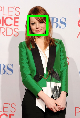

Found 1 face(s)!


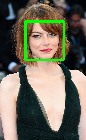

Found 1 face(s)!


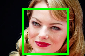

Found 1 face(s)!


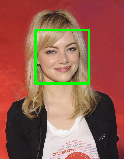

Found 1 face(s)!


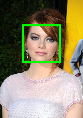

Found 1 face(s)!


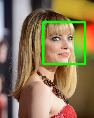

Found 1 face(s)!


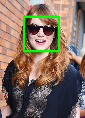

Found 2 face(s)!


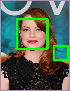

Found 1 face(s)!


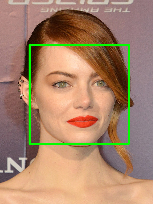

Found 1 face(s)!


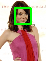

Found 0 face(s)!


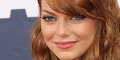

Found 1 face(s)!


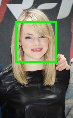

Found 2 face(s)!


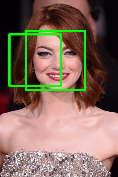

Found 1 face(s)!


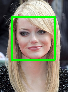

Found 1 face(s)!


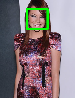

Found 1 face(s)!


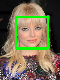

Found 1 face(s)!


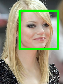

Found 1 face(s)!


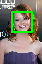

Found 1 face(s)!


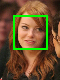

Found 1 face(s)!


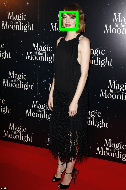

Found 1 face(s)!


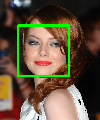

Found 0 face(s)!


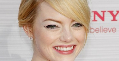

Found 1 face(s)!


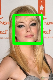

Found 1 face(s)!


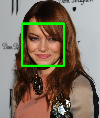

Found 1 face(s)!


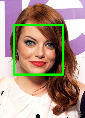

Found 1 face(s)!


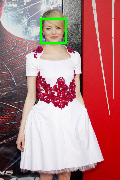

Found 1 face(s)!


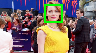

Found 1 face(s)!


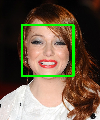

Found 1 face(s)!


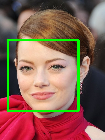

Found 1 face(s)!


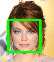

Found 1 face(s)!


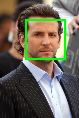

Found 1 face(s)!


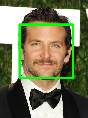

Found 1 face(s)!


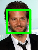

Found 1 face(s)!


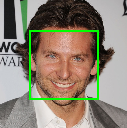

Found 2 face(s)!


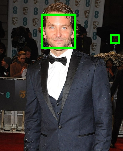

Found 1 face(s)!


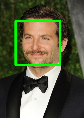

Found 2 face(s)!


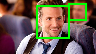

Found 1 face(s)!


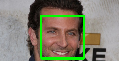

Found 1 face(s)!


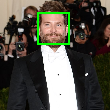

Found 1 face(s)!


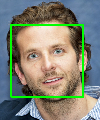

Found 1 face(s)!


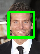

Found 1 face(s)!


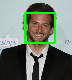

Found 1 face(s)!


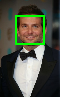

Found 1 face(s)!


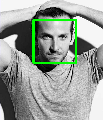

Found 1 face(s)!


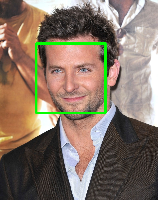

Found 1 face(s)!


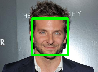

Found 1 face(s)!


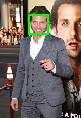

Found 1 face(s)!


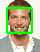

Found 1 face(s)!


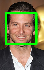

Found 1 face(s)!


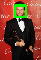

Found 1 face(s)!


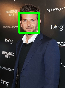

Found 2 face(s)!


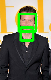

Found 1 face(s)!


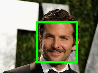

Found 1 face(s)!


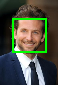

Found 1 face(s)!


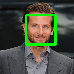

Found 1 face(s)!


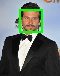

Found 1 face(s)!


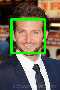

Found 1 face(s)!


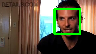

Found 1 face(s)!


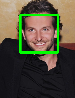

Found 1 face(s)!


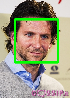

Found 1 face(s)!


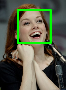

Found 1 face(s)!


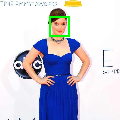

Found 1 face(s)!


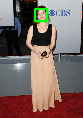

Found 1 face(s)!


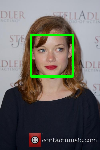

Found 1 face(s)!


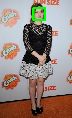

Found 1 face(s)!


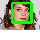

Found 1 face(s)!


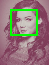

Found 1 face(s)!


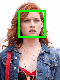

Found 1 face(s)!


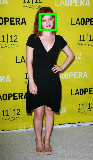

Found 1 face(s)!


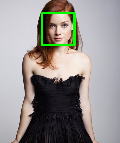

Found 1 face(s)!


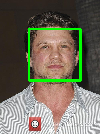

Found 1 face(s)!


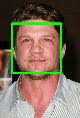

Found 1 face(s)!


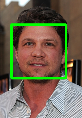

Found 1 face(s)!


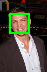

Found 1 face(s)!


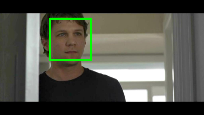

Found 1 face(s)!


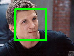

Found 1 face(s)!


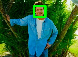

Found 2 face(s)!


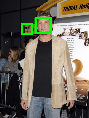

Found 1 face(s)!


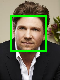

Found 1 face(s)!


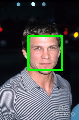

In [37]:
faceCascade = cv2.CascadeClassifier(os.path.join(base_path, "haarcascade_frontalface_default.xml"))

with open(file_info, 'r') as f: 
    lines = f.readlines()

for person in persons:
    # print(len(images[person]))    
    # cv2_imshow(images[person][0])
    # for images_ in images[person]:
    running_index = 0
    for img in images[person]:

        img_ = img.copy()
        # cv2_imshow(img)
        img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
            img_gray,
            scaleFactor=1.2,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )
        print("Found {} face(s)!".format(len(faces)))

        for (x, y, w, h) in faces:
            cv2.rectangle(img_, (x, y), (x+w, y+h), (0, 255, 0), 10)

        h, w = img_.shape[:2]
        
        # draw_box(lines, int(vgg_ids[person][running_index])+1, img_, person)
        running_index +=1 
        
        cv2_imshow(cv2.resize(img_, (w // 5, h // 5)))

From Datasets of images to Trainng set and validation sets;

```
images[person]
```
is a dictionary of all the images in the database that are dedicated to a specific person. In order to obtain a :
* training set
* test set

for the person A and B, one can randomly select 20 images for validation sets, and 10 images for test sets. 

For the sake of reproducibility, the details are logged

In [0]:
training_sets_size = {}
training_sets_size[personA] = 20
training_sets_size[personB] = 20
training_sets_size[personC] = 0
training_sets_size[personD] = 0

test_sets_size = {}
test_sets_size[personA] = 10
test_sets_size[personB] = 10
test_sets_size[personC] = 10
test_sets_size[personD] = 10

training_set = {}
test_set = {}
for person in persons:
    image_ = images[person]
    training_set_ = []
    random.seed(person)
    init_set = set(range(0, len(image_)))

    indices_training = random.sample(init_set, training_sets_size[person])
    indices_test = list(init_set - set(indices_training))

    training_set[person] = [images[person][i] for i in indices_training] 
    test_set[person] = [images[person][i] for i in indices_test]



In [0]:
logging.debug("training_set")
for p in persons:
    logging.debug("######################################################################")
    logging.debug(p)
    for img in training_set[p]:
        cv2_imshow(img)
